# lemon quality dataset
### #kaggle
[link to the dataset](https://www.kaggle.com/datasets/yusufemir/lemon-quality-dataset?resource=download) <br>
testing basic neural network architectures for image classification with tensorflow

![lemons](https://storage.googleapis.com/kaggle-datasets-images/2502063/4245788/ab6e0be3e2fa5323807bbe18e771d3f4/dataset-cover.jpg?t=2022-09-24-23-11-12)

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
seed = 58 # degree of lemon yellow at HSL color wheel

2022-10-24 12:14:26.359160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 12:14:27.178276: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-24 12:14:27.178303: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-24 12:14:27.278897: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-24 12:14:29.322703: W tensorflow/stream_executor/platform/de

In [2]:
# set directory to dataset folder
dir_lem = 'lemon_dataset'

In [3]:
# use the keras ImageDataGenerator to load data and labels
image_gen = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_set = image_gen.flow_from_directory(batch_size=32,
        directory=dir_lem, 
        shuffle=True,
        seed=seed,
        target_size=(224, 224),
        color_mode='rgb',
        subset='training',
        class_mode='categorical')

test_set = image_gen.flow_from_directory(batch_size=32,
        directory=dir_lem, 
        shuffle=True,
        seed=seed,
        target_size=(224, 224),
        color_mode='rgb',
        subset='validation',
        class_mode='categorical')

# https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

Found 2023 images belonging to 3 classes.
Found 505 images belonging to 3 classes.


{'bad_quality': 0, 'empty_background': 1, 'good_quality': 2}
dict_values([761, 362, 900])


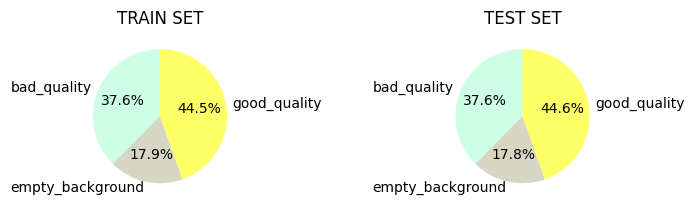

In [4]:
# distribution of targets in dataset
dict_classes = train_set.class_indices
print(dict_classes)
label_names = list(dict_classes.keys())
counter_train = Counter(train_set.classes).values()
counter_test = Counter(test_set.classes).values()
print(counter_train)
lemon_colors = ['#ccffe6','#d6d6c2','#ffff66']

#plot class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.4,2.2))
ax1.pie(counter_train, labels=label_names, colors=lemon_colors, autopct='%1.1f%%', startangle=90)
ax2.pie(counter_test, labels=label_names, colors=lemon_colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('TRAIN SET')
ax2.set_title('TEST SET')
fig.tight_layout()
plt.show()

### simple NN model setup

In [43]:
# setup the model
snn_model = keras.Sequential([
    keras.layers.Flatten(),   # dimension
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 classes
])

snn_model.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

#ttps://www.youtube.com/watch?v=KNAWp2S3w94&list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO

training of simple NN model

In [44]:
# train the model with train set
snn_history = snn_model.fit(
  train_set,
  epochs=5
)

Epoch 1/5
57/57 [==============================] - 12s 192ms/step - loss: 11.4469 - accuracy: 0.6582
Epoch 2/5
57/57 [==============================] - 12s 209ms/step - loss: 0.3540 - accuracy: 0.9025
Epoch 3/5
57/57 [==============================] - 13s 224ms/step - loss: 0.5195 - accuracy: 0.8726
Epoch 4/5
57/57 [==============================] - 11s 193ms/step - loss: 0.3896 - accuracy: 0.9047
Epoch 5/5
57/57 [==============================] - 11s 198ms/step - loss: 0.3002 - accuracy: 0.9235


In [7]:
print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, None)              0         
                                                                 
 dense (Dense)               (None, 64)                9633856   
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9,634,051
Trainable params: 9,634,051
Non-trainable params: 0
_________________________________________________________________
None


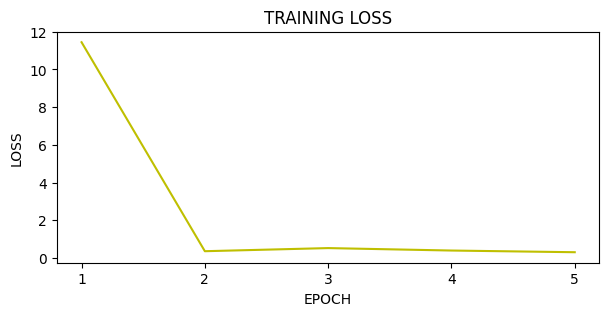

In [66]:
# plot loss over epochs
fig=plt.figure(figsize=(7,3))
plt.plot(range(1,6),snn_history.history['loss'], 'y')
plt.xticks(range(1,6))
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('TRAINING LOSS')
plt.show()

simple NN model prediction and evaluation

In [9]:
# predict with test set
predictions = np.argmax(snn_model.predict(test_set), axis=1)

16/16 [==============================] - 3s 173ms/step


accuracy: 0.3465


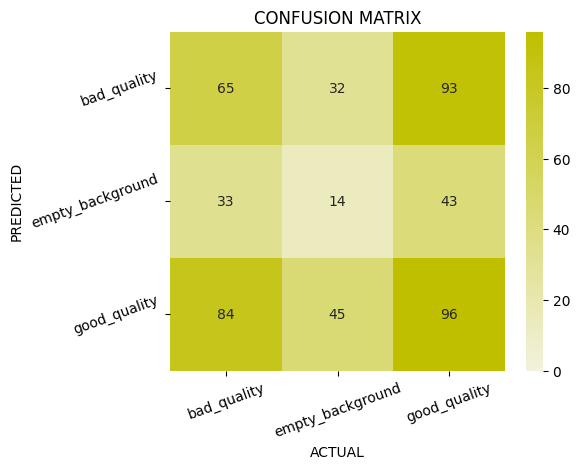

In [10]:
# model evaluation
acc = accuracy_score(test_set.labels, predictions)
print(f'accuracy: {round(acc, 4)}')

cm = tf.math.confusion_matrix(test_set.labels, predictions)

lemon_cmap = sns.color_palette("light:y", as_cmap=True)
plt.figure(figsize=(5.4,4.4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap=lemon_cmap)
plt.xticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.xlabel('ACTUAL')
plt.yticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.ylabel('PREDICTED')
plt.title('CONFUSION MATRIX')
plt.show()

+ the simple model does not perform very well

🍋

split of extra data for validation during learning and testing in the end

In [ ]:
# copy data and split of a small part of data for prediction
dir_splitted = 'splitted_dataset'

# 91 is ~ 20% of the sparsest class
splitfolders.fixed(dir_lem, output=dir_splitted, seed=seed, fixed=91, group_prefix=None) # ratio() did not result stratified classes for testing

# https://stackoverflow.com/questions/62662194/keras-imagedatagenerator-validation-split-not-selected-from-shuffled-dataset
# https://pypi.org/project/split-folders/

In [11]:
dir_train = 'splitted_dataset/train/'
dir_test = 'splitted_dataset/val/'

In [12]:
image_gen = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_set = image_gen.flow_from_directory(batch_size=32,
        directory=dir_train, 
        shuffle=True,
        seed=seed,
        target_size=(224, 224),
        color_mode='rgb',
        subset='training',
        class_mode='categorical')

vali_set = image_gen.flow_from_directory(batch_size=32,
        directory=dir_train, 
        shuffle=True,
        seed=seed,
        target_size=(224, 224),
        color_mode='rgb',
        subset='validation',
        class_mode='categorical')

test_gen = ImageDataGenerator(rescale=1/255)
test_set = test_gen.flow_from_directory(batch_size=32,
        directory=dir_test, 
        shuffle=False,   # dont shuffle test set (or you will mess up the labeling)
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical')

# https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator
# https://www.youtube.com/watch?v=RmTsvLTypIE

Found 1805 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 273 images belonging to 3 classes.


dictionary of classes: {'bad_quality': 0, 'empty_background': 1, 'good_quality': 2}
counts for each class: dict_values([688, 289, 828])


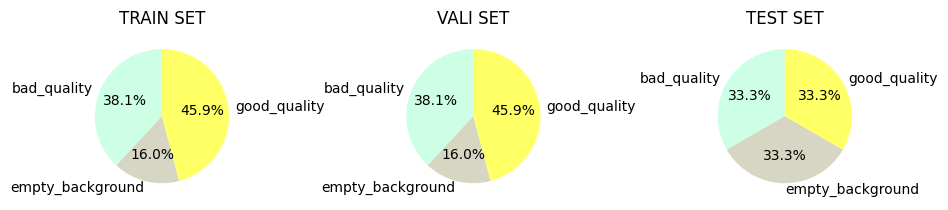

In [33]:
# distribution of targets in dataset
dict_classes = train_set.class_indices
print(f'dictionary of classes: {dict_classes}')
label_names = list(dict_classes.keys())
counter_train = Counter(train_set.classes).values()
counter_vali = Counter(vali_set.classes).values()
counter_test = Counter(test_set.classes).values()
print(f'counts for each class: {counter_train}')
lemon_colors = ['#ccffe6','#d6d6c2','#ffff66']

#plot class distribution
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9.4,2.2))
ax1.pie(counter_train, labels=label_names, colors=lemon_colors, autopct='%1.1f%%', startangle=90)
ax2.pie(counter_train, labels=label_names, colors=lemon_colors, autopct='%1.1f%%', startangle=90)
ax3.pie(counter_test, labels=label_names, colors=lemon_colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('TRAIN SET')
ax2.set_title('VALI SET')
ax3.set_title('TEST SET')
fig.tight_layout()
plt.show()

+ class imbalance

train simple NN model with validation after each epoch

In [34]:
# setup the model
nn_model = keras.Sequential([
    keras.layers.Flatten(),   # dimension
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 classes
])

nn_model.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [35]:
nn_history = nn_model.fit(
  train_set,
  validation_data=vali_set,
  epochs=5
)

Epoch 1/5
57/57 [==============================] - 15s 250ms/step - loss: 6.0071 - accuracy: 0.6914 - val_loss: 1.0896 - val_accuracy: 0.7578
Epoch 2/5
57/57 [==============================] - 14s 243ms/step - loss: 0.2897 - accuracy: 0.9091 - val_loss: 0.2045 - val_accuracy: 0.9178
Epoch 3/5
57/57 [==============================] - 14s 244ms/step - loss: 0.6915 - accuracy: 0.8676 - val_loss: 0.6901 - val_accuracy: 0.8489
Epoch 4/5
57/57 [==============================] - 14s 242ms/step - loss: 0.6075 - accuracy: 0.8909 - val_loss: 0.6476 - val_accuracy: 0.8689
Epoch 5/5
57/57 [==============================] - 14s 249ms/step - loss: 0.2691 - accuracy: 0.9319 - val_loss: 0.2037 - val_accuracy: 0.9333


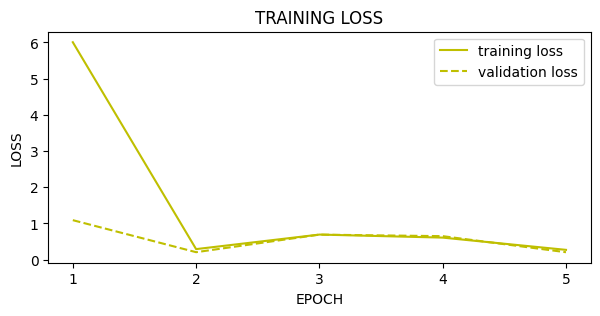

In [70]:
# plot loss over epochs
fig=plt.figure(figsize=(7,3))
plt.plot(range(1,6), nn_history.history['loss'], 'y', label='training loss')
plt.plot(range(1,6), nn_history.history['val_loss'], 'y--', label='validation loss')
plt.xticks(range(1,6))
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('TRAINING LOSS')
plt.legend()
plt.show()

In [37]:
predictions = np.argmax(nn_model.predict(test_set), axis=1)

9/9 [==============================] - 2s 190ms/step


accuracy: 0.9341


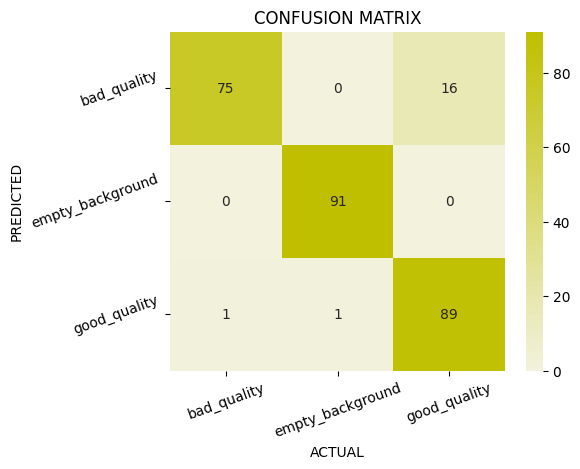

In [38]:
# model evaluation
acc = accuracy_score(test_set.labels, predictions)
print(f'accuracy: {round(acc, 4)}')

cm = tf.math.confusion_matrix(test_set.labels, predictions)

lemon_cmap = sns.color_palette("light:y", as_cmap=True)
plt.figure(figsize=(5.4,4.4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap=lemon_cmap)
plt.xticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.xlabel('ACTUAL')
plt.yticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.ylabel('PREDICTED')
plt.title('CONFUSION MATRIX')
plt.show()

+ validation during training leads to a much better performance of the simple neural network

try a second simple NN with a double dense layer but half of the nodes per layer

In [39]:
nn_model_2 =keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

nn_model_2.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

nn_history_2 = nn_model_2.fit(
  train_set,
  validation_data=vali_set,
  epochs=5)

Epoch 1/5
57/57 [==============================] - 15s 262ms/step - loss: 3.5466 - accuracy: 0.6055 - val_loss: 0.4436 - val_accuracy: 0.7933
Epoch 2/5
57/57 [==============================] - 14s 238ms/step - loss: 0.3425 - accuracy: 0.8526 - val_loss: 0.3506 - val_accuracy: 0.8444
Epoch 3/5
57/57 [==============================] - 14s 247ms/step - loss: 0.2037 - accuracy: 0.9208 - val_loss: 0.3605 - val_accuracy: 0.8333
Epoch 4/5
57/57 [==============================] - 14s 246ms/step - loss: 0.2355 - accuracy: 0.8992 - val_loss: 0.3070 - val_accuracy: 0.8667
Epoch 5/5
57/57 [==============================] - 17s 303ms/step - loss: 0.1788 - accuracy: 0.9357 - val_loss: 0.2383 - val_accuracy: 0.8933


9/9 [==============================] - 2s 181ms/step
accuracy: 0.9011


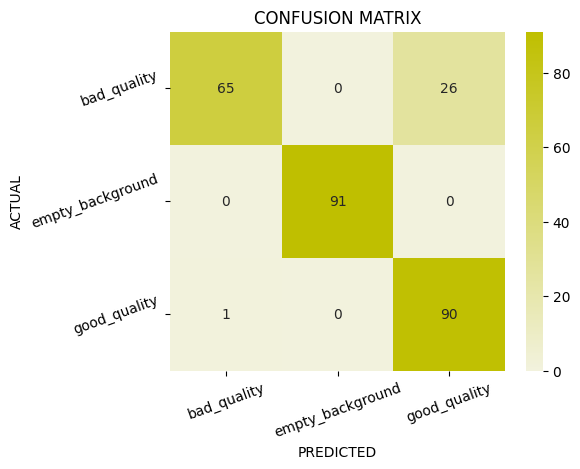

In [40]:
predictions = np.argmax(nn_model_2.predict(test_set), axis=1)

acc = accuracy_score(test_set.labels, predictions)
print(f'accuracy: {round(acc, 4)}')

cm = tf.math.confusion_matrix(test_set.labels, predictions)

lemon_cmap = sns.color_palette("light:y", as_cmap=True)
plt.figure(figsize=(5.4,4.4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, vmax=91, cmap=lemon_cmap)
plt.xticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.xlabel('PREDICTED')
plt.yticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.ylabel('ACTUAL')
plt.title('CONFUSION MATRIX')
plt.show()

+ no improvement

🍋 🍋

## setup a CNN for feature recognition

In [20]:
# setup simple convolutional neural network
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(8,8),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])


# https://www.youtube.com/watch?v=x_VrgWTKkiM&list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO&index=3

In [21]:
# train the CNN mmodel
cnn_history = cnn_model.fit(
  train_set,
  validation_data=vali_set,
  epochs=5)

Epoch 1/5
57/57 [==============================] - 38s 655ms/step - loss: 0.5655 - accuracy: 0.7795 - val_loss: 0.1984 - val_accuracy: 0.9178
Epoch 2/5
57/57 [==============================] - 43s 747ms/step - loss: 0.1412 - accuracy: 0.9524 - val_loss: 0.0959 - val_accuracy: 0.9778
Epoch 3/5
57/57 [==============================] - 68s 1s/step - loss: 0.0884 - accuracy: 0.9706 - val_loss: 0.0703 - val_accuracy: 0.9778
Epoch 4/5
57/57 [==============================] - 58s 1s/step - loss: 0.1015 - accuracy: 0.9629 - val_loss: 0.0598 - val_accuracy: 0.9800
Epoch 5/5
57/57 [==============================] - 59s 1s/step - loss: 0.0870 - accuracy: 0.9673 - val_loss: 0.0541 - val_accuracy: 0.9844


In [22]:
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 23328)             0         
                                                                 
 dense_5 (Dense)             (None, 64)                1493056   
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,494,147
Trainable params: 1,494,147
Non-trainable params: 0
____________________________________________

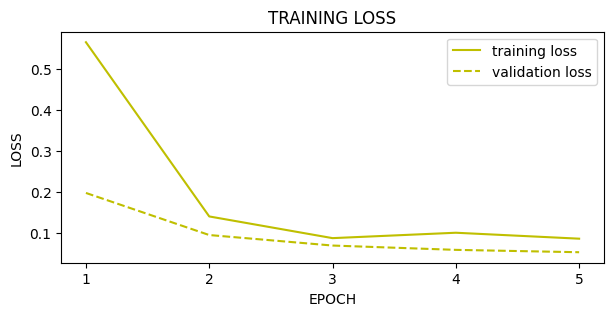

In [71]:
# plot loss over epochs
fig=plt.figure(figsize=(7,3))
plt.plot(range(1,6), cnn_history.history['loss'], 'y', label='training loss')
plt.plot(range(1,6), cnn_history.history['val_loss'], 'y--', label='validation loss')
plt.xticks(range(1,6))
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('TRAINING LOSS')
plt.legend()
plt.show()

In [24]:
# CNN model predition
predictions = np.argmax(cnn_model.predict(test_set), axis=1)

9/9 [==============================] - 2s 215ms/step


accuracy: 0.9817


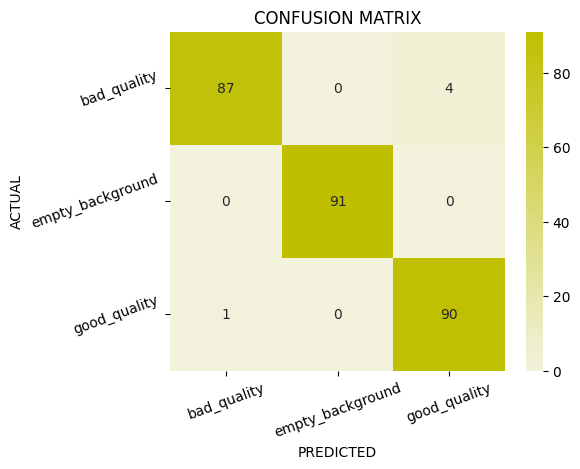

In [25]:
# evaluate simple CNN model
acc = accuracy_score(test_set.labels, predictions)
print(f'accuracy: {round(acc, 4)}')

cm = tf.math.confusion_matrix(test_set.labels, predictions)

lemon_cmap = sns.color_palette("light:y", as_cmap=True)
plt.figure(figsize=(5.4,4.4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, vmax=91, cmap=lemon_cmap)
plt.xticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.xlabel('PREDICTED')
plt.yticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.ylabel('ACTUAL')
plt.title('CONFUSION MATRIX')
plt.show()

+ the convolutional neural network performed pretty well

## use a pretrained model to get features

In [26]:
pretrained_model = keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,   # dont use classification of model only the feature extraction
    weights='imagenet', 
    pooling='avg'
)

pretrained_model.trainable=False # no extra training

In [27]:
# combine pretrained model base with classification layers that fit the dataset
inputs = pretrained_model.input
x = keras.layers.Dense(64, activation='relu')(pretrained_model.output)    
outputs = keras.layers.Dense(3, activation='softmax')(x)

pcnn_model = keras.Model(inputs=inputs, outputs=outputs)

pcnn_model.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])


# https://www.youtube.com/watch?v=RmTsvLTypIE

In [28]:
print(pcnn_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [29]:
pcnn_history = pcnn_model.fit(
  train_set,
  validation_data=vali_set,
  epochs=5)

Epoch 1/5
57/57 [==============================] - 78s 1s/step - loss: 0.1507 - accuracy: 0.9429 - val_loss: 0.0647 - val_accuracy: 0.9756
Epoch 2/5
57/57 [==============================] - 80s 1s/step - loss: 0.0458 - accuracy: 0.9850 - val_loss: 0.0491 - val_accuracy: 0.9844
Epoch 3/5
57/57 [==============================] - 83s 1s/step - loss: 0.0361 - accuracy: 0.9867 - val_loss: 0.0428 - val_accuracy: 0.9822
Epoch 4/5
57/57 [==============================] - 81s 1s/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0553 - val_accuracy: 0.9756
Epoch 5/5
57/57 [==============================] - 88s 2s/step - loss: 0.0133 - accuracy: 0.9978 - val_loss: 0.0536 - val_accuracy: 0.9756


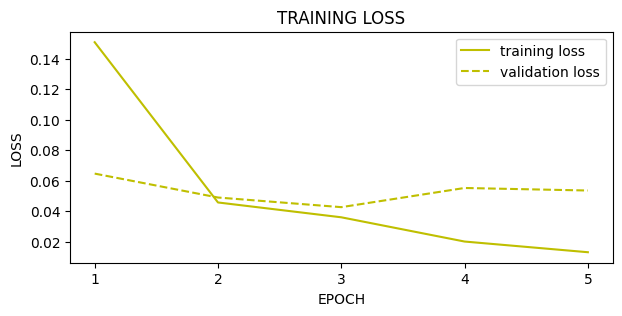

In [72]:
# plot loss over epochs
fig=plt.figure(figsize=(7,3))
plt.plot(range(1,6), pcnn_history.history['loss'], 'y', label='training loss')
plt.plot(range(1,6), pcnn_history.history['val_loss'], 'y--', label='validation loss')
plt.xticks(range(1,6))
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('TRAINING LOSS')
plt.legend()
plt.show()

In [31]:
# predict with help of pretrained CNN model
predictions = np.argmax(pcnn_model.predict(test_set), axis=1)

9/9 [==============================] - 5s 435ms/step


accuracy: 0.9853


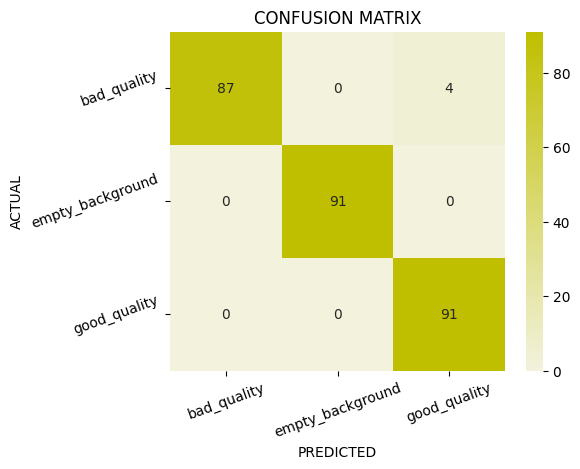

In [32]:
# evaluate transfer learning performance 
acc = accuracy_score(test_set.labels, predictions)
print(f'accuracy: {round(acc, 4)}')

cm = tf.math.confusion_matrix(test_set.labels, predictions)

lemon_cmap = sns.color_palette("light:y", as_cmap=True)
plt.figure(figsize=(5.4,4.4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, vmax=91, cmap=lemon_cmap)
plt.xticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.xlabel('PREDICTED')
plt.yticks(ticks=np.arange(3)+0.5, labels=label_names, rotation=20)
plt.ylabel('ACTUAL')
plt.title('CONFUSION MATRIX')
plt.show()

+ the model using the pretrained features performed the best

🍋 🍋 🍋

## overall summary
+ validation after each epoch helps neural network classifying
+ adding a convolutional layer to the neural network clearly increases model performance 
+ the model using features extracted by a pretrained model helped to predict the classes, but in this case did not outperform the simple convolutional neural network
+ despite a class imbalance the model exactly predicted the results for the least abundant class
+ the final model is confused by some bad quality lemons which are considered good quality - maybe it is on a mission against the throwaway society